# TEXT CLASSIFICATION

In this chapter we will talk about text generation with Transformers
1. We will download the emotion dataset from hugging face hub

# Importing the transformer model from hugging face hub


# Download the datasets utility from hugging face hub

In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [2]:
from transformers import pipeline
import pandas as pd


In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("emotion")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:

train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_ds.num_rows

16000

In [11]:
train_ds[:7]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny'],
 'label': [0, 0, 3, 2, 3, 0, 5]}

In [12]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

# DATASET to DATAFRAMES
In this chapter we will convert the dataset to dataframe

In [13]:
dataset.set_format(type="pandas")
train_df = dataset["train"][:]
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
train_ds.to_pandas().head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


 Converting the numerical labels into their corresponding string representations in an emotion classification dataset


In [15]:
def label_int2str(row, split):
  return dataset[split].features["label"].int2str(row)
train_df["label_name"] = train_df["label"].apply(label_int2str, split ="train")
train_df.head()




,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Whenever you are working on text classification problems, it is a good idea to examine the
 distribution of examples among each class. For example, a dataset with a skewed class
 distribution might require a different treatment in terms of the training loss and evaluation
 metrics than a balanced one.

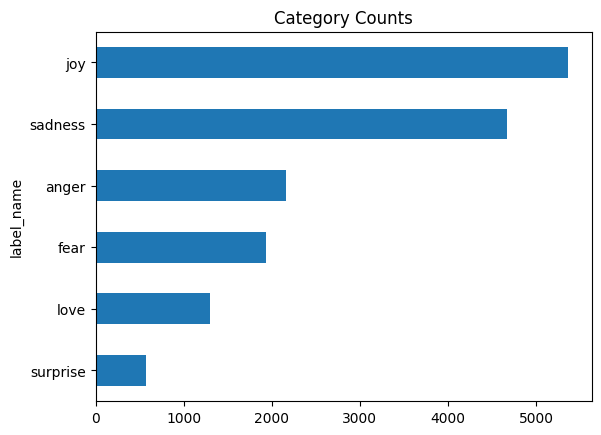

In [16]:
import matplotlib.pyplot as plt
train_df["label_name"].value_counts(ascending =True).plot.barh()
plt.title("Category Counts");

# How long are tweets?
Transformer models have a maximum input sequence length that is referred to as the maximum
 context size. For most applications with BERT, the maximum context size is 512 tokens, where
 a token is defined by the choice of tokenizer and can be a word, subword, or character. Let’s
 make a rough estimate of our tweet lengths per emotion by looking at the distribution of words
 per tweet

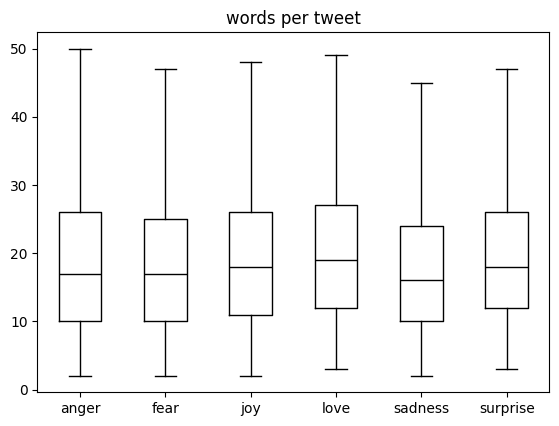

In [17]:
train_df["words per tweet"] = train_df["text"].str.split().apply(len)
train_df.boxplot("words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

# From Text to Tokens
Transformers like BERT cannot recieve raw strings as input; instead they assume text has been tokenized into numerical vectors Tokenization is the step of breaking down a
 string into the atomic units used in the model

Import the Autotokenizer from transformers

In [18]:
from transformers import AutoTokenizer
# Pretrained tokenizer that follows the WordPiece tokenization method.
#Converts raw text into subword tokens (e.g., "playing" → "play" + "##ing").
#Lowercased version (meaning all input text is converted to lowercase).
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
# checking the vocabuary size
tokenizer.vocab_size

30522

Checking the specal token used in our pretraind tokenizer

Special tokens are unique markers added by tokenizers to help transformer models understand different parts of input text. These tokens serve specific purposes such as marking sentence boundaries, handling missing words, or guiding different language modeling tasks.


In [20]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [21]:
# Checking the max length of our tokens
tokenizer.model_max_length

512

# Training a Text Classifier

 **Feature extraction**

 We use the hidden states as features and just train a classifier on them.

 **Fine-tuning**

 We train the whole model end-to-end, which also updates the parameters of the pretrained
 BERT model.

# Transformers as Feature Extractors
To use a Transformer as a feature extractor is fairly simple; we freeze
 the body’s weights during training and use the hidden states as features for the classifier. The
 advantage of this approach is that we can quickly train a small or shallow model. Such a model
 could be a neural classification layer or a method that does not rely on gradients such a
 Random Forest. This method is especially convenient if GPUs are unavailable since the hidden
 states can be computed relatively fast on a CPU


Using pytorch to detect if GPU or CPU is available

In [22]:
from transformers import AutoModel
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_name).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Tokenizing the dataset

In [23]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

In [24]:
# reseting the our dataset to the it original format from dataframe
dataset.reset_format()
# applying the tokenize to our dataset
tokenize(dataset["train"][:3])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

Let apply the tokenize function to the whole dataset


In [25]:
dataset_encoded = dataset.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [26]:
print(dataset_encoded.column_names)

{'train': ['text', 'label', 'input_ids', 'attention_mask'], 'validation': ['text', 'label', 'input_ids', 'attention_mask'], 'test': ['text', 'label', 'input_ids', 'attention_mask']}


#  From Input IDs to Hidden States
Now that we have converted our tweets to numerical inputs, the next step is to extract the last
 hidden states so that we can feed them to a classifier.
 For this, we can use the
 DatasetDict.map function again! Let’s define a forward_pass function that takes a
 batch of input IDs and attention masks, feeds them to the model, and adds a new
 hidden_state feature to our batch:

In [27]:
import numpy as np
def forward_pass(batch):
  input_ids = torch.tensor(batch["input_ids"]).to(device)
  attention_mask = torch.tensor(batch["attention_mask"]).to(device)

  with torch.no_grad():
    last_hidden_state = model(input_ids, attention_mask).last_hidden_state
    last_hidden_state = last_hidden_state.cpu().numpy()

    # use Average of ummasked hidden states for the classification
  lhs_shape = last_hidden_state.shape
  boolean_mask = np.array(batch["attention_mask"]).astype(bool)
  boolean_mask = np.repeat(boolean_mask, lhs_shape[-1], axis = -1)
  boolean_mask = boolean_mask.reshape(lhs_shape)
  masked_mean = np.ma.array(last_hidden_state, mask = boolean_mask).mean(axis = 1)
  batch["hidden_state"] = masked_mean.data
  return batch
dataset_encoded = dataset_encoded.map(forward_pass, batched = True, batch_size = 16)



Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [28]:
dataset_encoded["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)}

# Creating a feature Matrix
The preprocessed dataset now contains all the information we need to train a clasifier on it. We
 will use the hidden states as input features and the labels as targets. We can easily create the
 corresponding arrays in the well known Scikit-Learn format as follows:

In [29]:
X_train = np.array(dataset_encoded["train"]["hidden_state"])
y_train = np.array(dataset_encoded["train"]["label"])
X_valid = np.array(dataset_encoded["validation"]["hidden_state"])
y_valid = np.array(dataset_encoded["validation"]["label"])

In [30]:
X_train.shape, y_train.shape

((16000, 768), (16000,))

# Dimensinality reduction with UMAP
 Before we train a model on the hidden states, it is good practice to perform a sanity check that
 they provide a useful representation of the emotions we want to classify. Since visualising the
 hidden states in 768 dimensions is tricky to say the least, we’ll use the powerful UMAP
 algorithm to project the vectors down to 2D. Since UMAP works best when the features are
 scaled to lie in the [0,1] interval, we’ll first apply a MinMaxScaler and then use UMAP to
 reduce the hidden states:

In [31]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.7 MB/s eta 0:00:00


In [32]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
mapper = UMAP(n_components = 2, metric = "cosine").fit(X_train_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns = ["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,1.460671,4.853387,0
1,1.833980,4.661419,0
2,2.558803,3.345830,3
3,2.363585,0.267725,2
4,0.594031,5.698583,3


In [33]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(n_jobs=-1, penalty=None)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

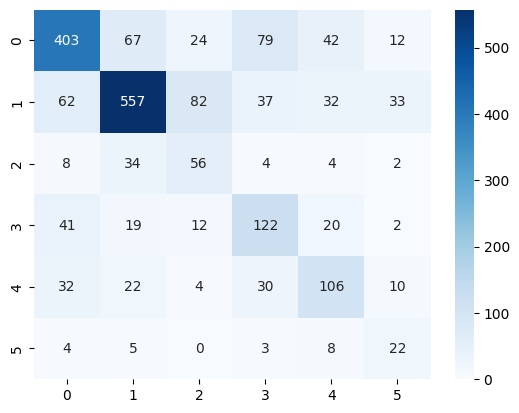

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr_clf.predict(X_valid)
confusion_matrix = confusion_matrix(y_pred, y_valid)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.show()

In [35]:
cl_report = classification_report(y_valid, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       550
           1       0.69      0.79      0.74       704
           2       0.52      0.31      0.39       178
           3       0.56      0.44      0.50       275
           4       0.52      0.50      0.51       212
           5       0.52      0.27      0.36        81

    accuracy                           0.63      2000
   macro avg       0.58      0.51      0.53      2000
weighted avg       0.62      0.63      0.62      2000



#  Fine-tuning Transformers
Let’s now explore what it takes to fine-tune a Transformer end-to-end. With the fine-tuning
 approach we do not use the hidden states as fixed features, but instead train them. This requires the classification head to be differentiable, which is why this method
 usually uses a neural network for classification. Since we retrain all the DistilBERT parameters,
 this approach requires much more compute than the feature extraction approach and typically
 requires a GPU.

In [36]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Prepocessed the tweet
 In addition to the tokenization we also need to set the format of the columns to
 torch.Tensor. This allows us to train the model without needing to change back and forth
 between lists, arrays, and tensors. With Datasets we can use the set_format function to
 change the data type of the columns we wish to keep, while dropping all the rest:



In [37]:
dataset_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
dataset_encoded["train"][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

# Defining the Metrics to moniterd by the Model
We define some metrics that are monitored during training. This can be any
 function that takes a prediction object, that contains the model predictions as well as the correct
 labels and returns a dictionary with scalar metric values. We will monitor the F1-score and the
 accuracy of the model.


In [38]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  fi = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"f1": fi, "accuracy": acc}


# Training the Model

In [39]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(dataset_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir = "results",
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay= 0.01,
                                  eval_strategy = "epoch",
                                  save_strategy = "epoch",
                                  disable_tqdm = False,
                                  logging_steps=logging_steps)

In [40]:
trainer = Trainer(model = model,
                  args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset= dataset_encoded["train"],
                  eval_dataset= dataset_encoded["validation"])
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kabuemmanuel2208 (kabuemmanuel2208-kwame-nkrumah-university-of-science-and) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,F1,Accuracy
1,0.842900,0.325040,0.897425,0.899500
2,0.253200,0.219683,0.922658,0.923000


TrainOutput(global_step=500, training_loss=0.5480913619995117, metrics={'train_runtime': 970.3615, 'train_samples_per_second': 32.977, 'train_steps_per_second': 0.515, 'total_flos': 720342861696000.0, 'train_loss': 0.5480913619995117, 'epoch': 2.0})

In [41]:
results =trainer.evaluate()
results

{'eval_loss': 0.2196831852197647,
 'eval_f1': 0.9226578028796134,
 'eval_accuracy': 0.923,
 'eval_runtime': 3.9376,
 'eval_samples_per_second': 507.927,
 'eval_steps_per_second': 8.127,
 'epoch': 2.0}

# Visualize the Confusion Matrix

In [45]:
preds_outputs = trainer.predict(dataset_encoded["validation"])
preds = np.argmax(preds_outputs.predictions, axis=-1)

In [46]:
preds_outputs.metrics

{'test_loss': 0.2196831852197647,
 'test_f1': 0.9226578028796134,
 'test_accuracy': 0.923,
 'test_runtime': 3.8028,
 'test_samples_per_second': 525.931,
 'test_steps_per_second': 8.415}

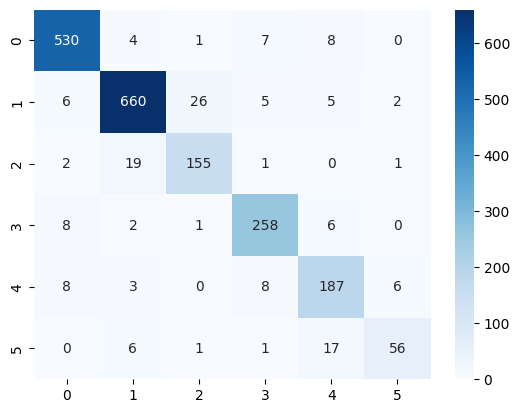

In [54]:
from sklearn.metrics import confusion_matrix  # Ensure correct import

y_preds = np.argmax(preds_outputs.predictions, axis=1)  # Get predicted labels

# Compute confusion matrix
CM = confusion_matrix(y_valid, y_preds, labels=range(6))

# Plot heatmap
sns.heatmap(CM, annot=True, cmap="Blues", fmt="d")
plt.show()


In [57]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       550
           1       0.95      0.94      0.94       704
           2       0.84      0.87      0.86       178
           3       0.92      0.94      0.93       275
           4       0.84      0.88      0.86       212
           5       0.86      0.69      0.77        81

    accuracy                           0.92      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.92      0.92      0.92      2000



# Making Predictions

In [59]:
custom_tweet = "i saw a movie today and it was really good."
input_tensor = tokenizer.encode(custom_tweet, return_tensors="pt").to("cuda")
logits = model(input_tensor).logits

In [60]:
logits

tensor([[-0.5952,  3.7746, -0.7294, -0.6715, -1.2595, -0.8846]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

We can easily make the predictions a probability distribution by applying a softmax function to
 them. Since we have a batch size of 1, we can get rid of the first dimension and convert the
 tensor to a NumPy array for processing on the CPU

In [61]:
 softmax = torch.nn.Softmax(dim=1)
 probs = softmax(logits)[0]
 probs = probs.cpu().detach().numpy()

In [62]:
probs

array([0.01203497, 0.9510865 , 0.01052337, 0.01115061, 0.00619359,
       0.00901086], dtype=float32)

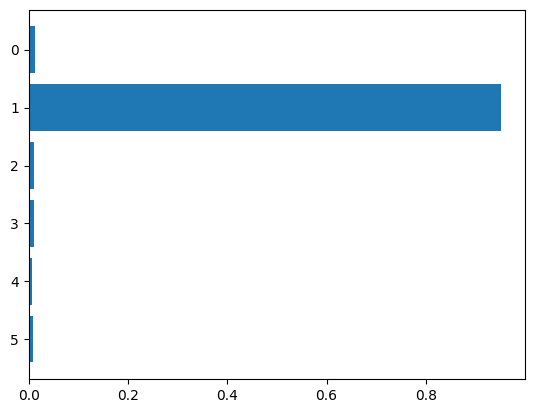

In [65]:
 plt.barh(range(6), probs)
 plt.gca().invert_yaxis()

# Error Analysis

In [67]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  input_ids = torch.tensor(batch["input_ids"], device=device)
  attention_mask = torch.tensor(batch["attention_mask"], device=device)
  labels = torch.tensor(batch["label"], device=device)
  with torch.no_grad():
    output = model(input_ids, attention_mask)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, labels, reduction="none")
  batch["predicted_label"] = pred_label.cpu().numpy()
  batch["loss"] = loss.cpu().numpy()
  return batch

In [68]:
dataset_encoded.reset_format()
dataset_encoded["validation"] = dataset_encoded["validation"].map(
forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

 Finally, we create a DataFrame with the texts, losses, and the predicted/true labels.

In [69]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str, split="test")
df_test["predicted_label"] = (df_test["predicted_label"]).apply(label_int2str, split="test")

In [70]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.339518
882,i feel badly about reneging on my commitment t...,love,sadness,5.192542
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.156049
1950,i as representative of everything thats wrong ...,surprise,anger,5.139185
1509,i guess this is a memoir so it feels like that...,joy,fear,5.103683
1274,i am going to several holiday parties and i ca...,joy,sadness,4.967919
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.923274
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.441409
539,i feel i should say what i want since you are ...,joy,anger,4.421467
1801,i feel that he was being overshadowed by the s...,love,sadness,4.350169


# Saving the model

In [71]:
trainer.save_model("models/ditilbert-emotion")
tokenizer.save_pretrained("models/ditilbert-emotion")

('models/ditilbert-emotion/tokenizer_config.json',
 'models/ditilbert-emotion/special_tokens_map.json',
 'models/ditilbert-emotion/vocab.txt',
 'models/ditilbert-emotion/added_tokens.json',
 'models/ditilbert-emotion/tokenizer.json')

In [72]:
pip install huggingface_hub

In [73]:
from huggingface_hub import notebook_login
notebook_login()

In [74]:
!git lfs install
!git clone https://huggingface.co/Kcapocheers/distilbert_fine_tune

Git LFS initialized.
Cloning into 'distilbert_fine_tune'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.13 KiB | 1.13 MiB/s, done.


In [78]:
!ls -lh


total 20K
drwxr-xr-x 3 root root 4.0K Feb 14 03:15 distilbert_fine_tune
drwxr-xr-x 3 root root 4.0K Feb 14 02:41 models
drwxr-xr-x 5 root root 4.0K Feb 14 01:58 results
drwxr-xr-x 1 root root 4.0K Feb 12 14:21 sample_data
drwxr-xr-x 3 root root 4.0K Feb 14 01:54 wandb


In [80]:
!ls -lh models/


total 4.0K
drwxr-xr-x 2 root root 4.0K Feb 14 02:41 ditilbert-emotion


In [87]:
!mv models/distilbert-emotion/* distilbert_fine_tune/


mv: cannot stat 'models/distilbert-emotion/*': No such file or directory


In [88]:
ls -lh models/ditilbert-emotion/


total 257M
-rw-r--r-- 1 root root  883 Feb 14 02:41 config.json
-rw-r--r-- 1 root root 256M Feb 14 02:41 model.safetensors
-rw-r--r-- 1 root root  125 Feb 14 02:41 special_tokens_map.json
-rw-r--r-- 1 root root 1.2K Feb 14 02:41 tokenizer_config.json
-rw-r--r-- 1 root root 695K Feb 14 02:41 tokenizer.json
-rw-r--r-- 1 root root 5.2K Feb 14 02:41 training_args.bin
-rw-r--r-- 1 root root 227K Feb 14 02:41 vocab.txt


In [89]:
mv models/ditilbert-emotion/* distilbert_fine_tune/


In [92]:
!cd models/ditilbert-emotion


In [93]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [94]:
!git remote -v


In [95]:
!git add .


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> distilbert_fine_tune
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached distilbert_fine_tune
hint: 
hint: See "git help submodule" for more information.


In [96]:
!git commit -m "Upload fine-tuned DistilBERT model"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@5ceeabe0fcd2.(none)')


In [97]:
!git config --global user.email "kabuemmanuel7@icloud.com"
!git config --global user.name "Kcapocheers"

In [98]:
!git commit -m "Upload fine-tuned DistilBERT model"

[master (root-commit) 60b5e5c] Upload fine-tuned DistilBERT model
 48 files changed, 52264 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.02.12/14.20.22.927935.log
 create mode 100644 .config/logs/2025.02.12/14.20.47.352041.log
 create mode 100644 .config/logs/2025.02.12/14.20.55.729161.log
 create mode 100644 .config/logs/2025.02.12/14.21.01.192414.log
 create mode 100644 .config/logs/2025.02.12/14.21.09.851644.log
 create mode 100644 .config/logs/2025.02.12/14.21.10.543221.log
 create mode 160000 distilbert_fine_tun

In [106]:
!git remote add origin https://huggingface.co/Kcapocheers/distilbert_fine_tune.git


In [107]:
!git remote -v


origin	https://huggingface.co/Kcapocheers/distilbert_fine_tune.git (fetch)
origin	https://huggingface.co/Kcapocheers/distilbert_fine_tune.git (push)


In [114]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   distilbert_fine_tune (untracked content)
	modified:   wandb/run-20250214_015426-aoycqw1x/files/output.log
	modified:   wandb/run-20250214_015426-aoycqw1x/logs/debug-internal.log
	modified:   wandb/run-20250214_015426-aoycqw1x/logs/debug.log

no changes added to commit (use "git add" and/or "git commit -a")


In [115]:
!git branch -m master main


fatal: A branch named 'main' already exists.


In [116]:
!git add .

In [117]:
!git commit -m "Initial commit with model and training logs"


[main 4ff9cbc] Initial commit with model and training logs
 3 files changed, 31 insertions(+), 1 deletion(-)


In [1]:
!git commit -a




fatal: not a git repository (or any of the parent directories): .git
